In [22]:
import pandas as pd

data = pd.read_csv("kommune.csv")
data.head()

,Unnamed: 0,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,1,1.0,7.0,7.0,7.0,6.0,6.0,7.0,6.0,7.0,...,3.0,7,5.0,4.0,3.0,0.0,3.0,1.0,4.0,1.0
2,2,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
3,3,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,8.0,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
4,4,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0


In [23]:
data.shape

(3708, 97)

In [24]:
data = data.drop("Unnamed: 0",axis=1) #remove this column that was added when I saved the file

In [25]:
#fix 
print(data['Q67a'].value_counts())
# I ould one hot encode this into two features, one for trust(1) and one for not trust(2)
# the 9999 values will then have 0 on both...
# Or I can use the fancy methods for setting the 9999 values to 1 or 2

1.0       2746
2.0        552
9999.0     280
Name: Q67a, dtype: int64


In [26]:
print(list(data))

['Spraak', 'Q1_natur_kom_1', 'Q1_natur_kom_2', 'Q1_natur_kom_3', 'Q1_kultur_kom_1', 'Q1_kultur_kom_2', 'Q1_kultur_kom_3', 'Q1_kultur_kom_4', 'Q1_kultur_kom_5', 'Q1_kultur_kom_6', 'Q1_kultur_kom_7', 'Q1_arbeid_kom_1', 'Q1_arbeid_kom_2', 'Q1_arbeid_kom_3', 'Q1_samferdsel_kom_1', 'Q1_samferdsel_kom_2', 'Q1_samferdsel_kom_3', 'Q1_samferdsel_kom_4', 'Q1_samferdsel_kom_5', 'Q1_samferdsel_kom_6', 'Q1_renovasjon_kom_1', 'Q1_renovasjon_kom_2', 'Q2_1', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5', 'Q5_1', 'Q6_1', 'Q7_1', 'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q9_8', 'Q9_9', 'Q9_10', 'Q9_11', 'Q10_1', 'Q11_1', 'Q13_1', 'Q14_1', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q16', 'Q18', 'Q19_1', 'Q19_2', 'Q46a', 'Q48a', 'Q52a', 'Q55a_1', 'Q55a_2', 'Q55a_3', 'Q55a_4', 'Q55a_9', 'Q60a', 'Q62a', 'Q64a_1', 'Q64a_2', 'Q64a_3', 'Q64a_4', 'Q64a_5', 'Q64a_6', 'Q64a_7', 'Q64a_8', 'Q64a_9', 'Q65a_1', 'Q65a_2', 'Q65a_3', 'Q65a_4', 'Q65a_5', 'Q65a_6', 'Q65ana', 'Q66a_1', 'Q68a', 'Id', 'Alderkat', 'Q56a', '

In [27]:
numerical_8 = ["Q1_natur_kom_1","Q1_natur_kom_2","Q1_natur_kom_3","Q1_kultur_kom_1",
                     "Q1_kultur_kom_2","Q1_kultur_kom_3","Q1_kultur_kom_4","Q1_kultur_kom_5",
                     "Q1_kultur_kom_6","Q1_kultur_kom_7","Q1_arbeid_kom_1","Q1_arbeid_kom_2",
                     "Q1_arbeid_kom_3","Q1_samferdsel_kom_1","Q1_samferdsel_kom_2","Q1_samferdsel_kom_3",
                     "Q1_samferdsel_kom_4","Q1_samferdsel_kom_5", "Q1_samferdsel_kom_6", "Q1_renovasjon_kom_1",
                     "Q1_renovasjon_kom_2","Q2_1","Q3_1","Q3_2","Q3_3", "Q3_4", "Q3_5","Q9_1",
                     "Q9_2","Q9_3","Q9_4","Q9_5","Q9_6","Q9_7","Q9_8","Q9_9","Q9_10","Q9_11",
                     "Q11_1","Q13_1","Q14_1","Q19_1","Q19_2","Q66a_1"]

numerical_7_9999 = ['Q5_1', 'Q6_1', 'Q7_1', 'Q10_1', ] 

numerical = ['Id', 'Q53a', 'Q54a'] 

boolean_unsure = ['Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q18']

categorical = ['Spraak', 'Q16', 'Q46a', 'Q48a','Q52a', 'Q60a', 'Q62a', 'Alderkat', 'Q56a', 
               'Q61a', 'Kommunestr', 'Fylke', 'Q49a', 'Sentralitet', 'Q57a', 'Q58a', 'Q63a', 
               'Q67a']

boolean = ['Q55a_1', 'Q55a_2', 'Q55a_3', 'Q55a_4', 'Q55a_9', 'Q64a_1', 'Q64a_2', 'Q64a_3', 
           'Q64a_4', 'Q64a_5', 'Q64a_6', 'Q64a_7', 'Q64a_8', 'Q64a_9', 'Q65a_1', 'Q65a_2', 
           'Q65a_3', 'Q65a_4', 'Q65a_5', 'Q65a_6', 'Q65ana', 'Q68a']

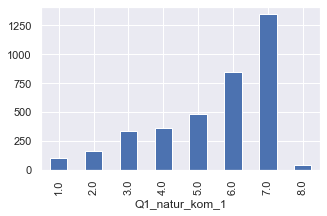

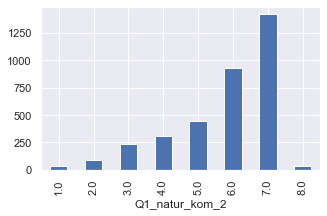

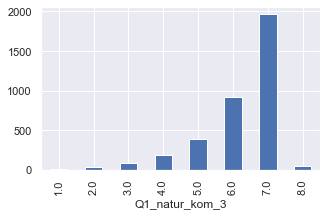

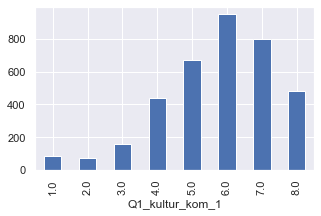

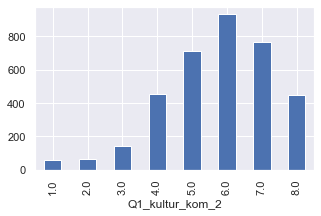

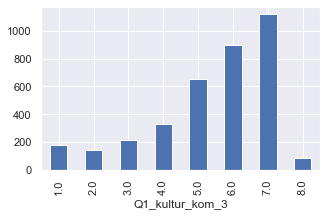

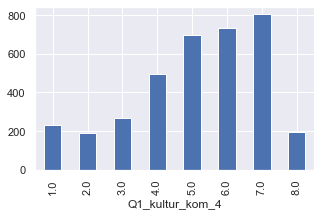

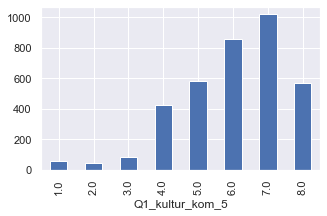

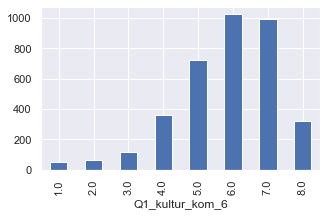

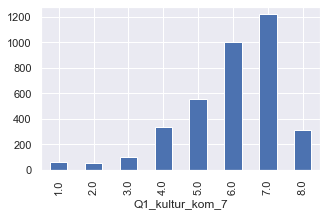

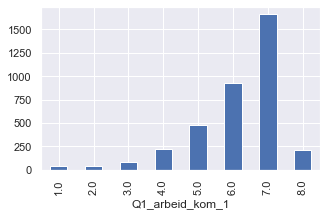

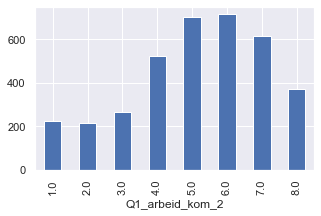

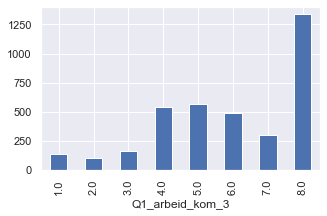

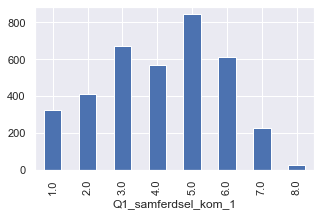

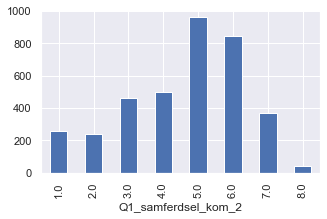

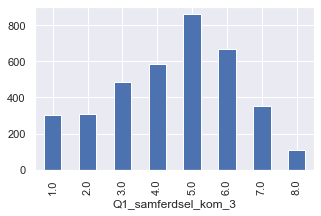

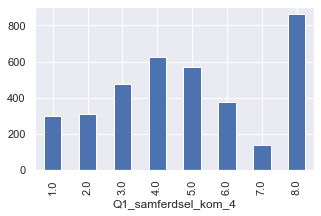

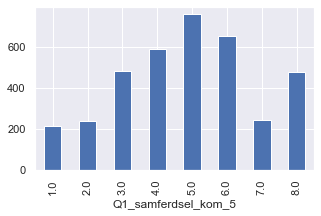

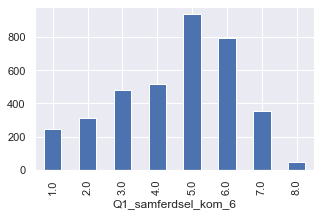

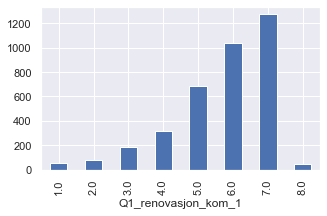

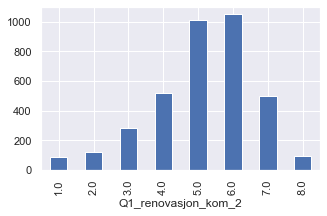

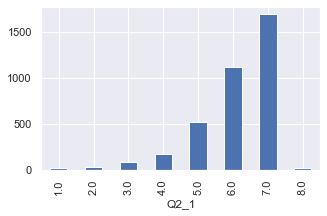

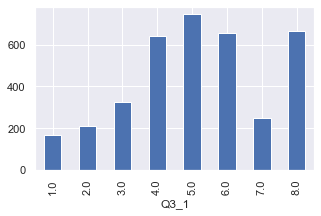

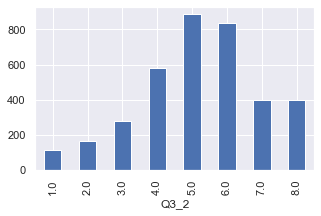

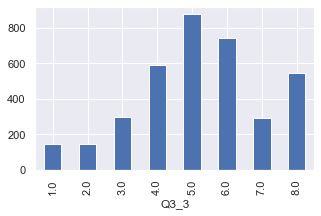

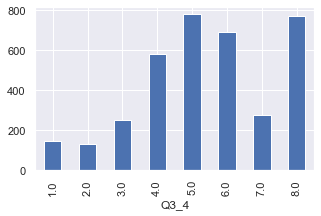

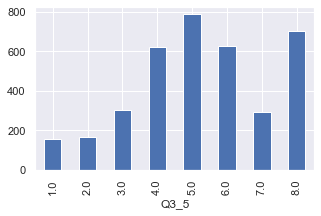

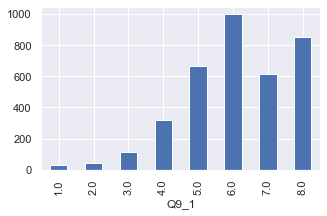

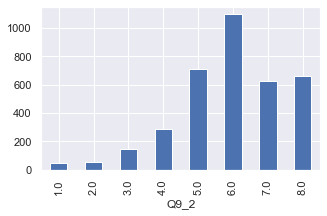

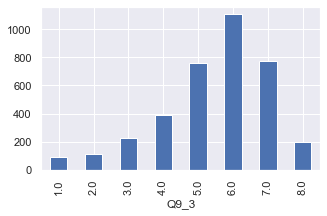

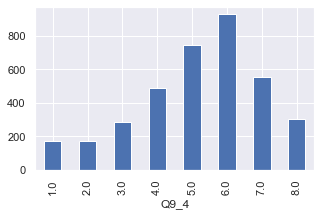

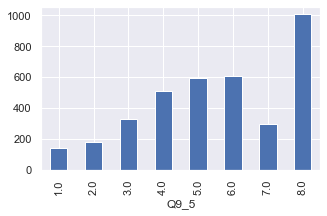

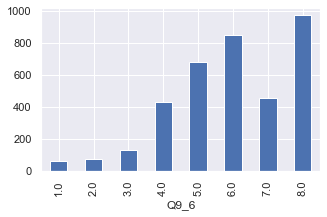

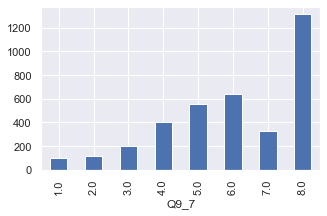

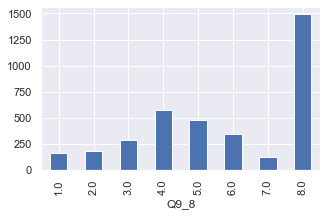

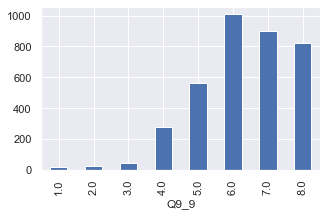

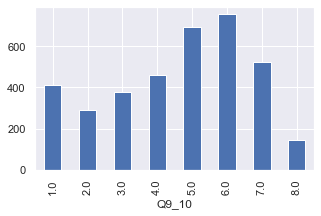

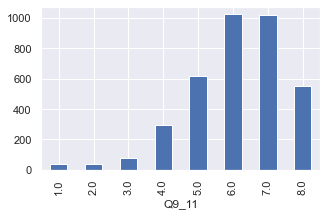

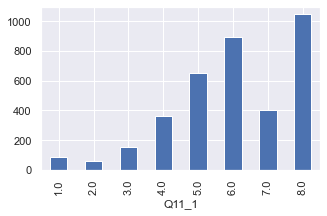

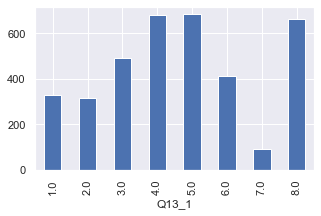

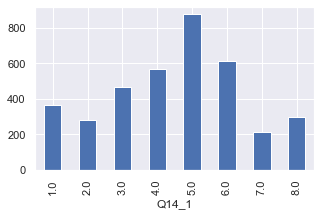

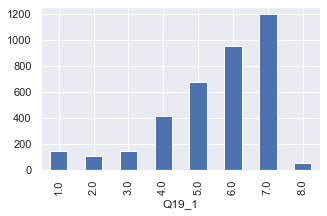

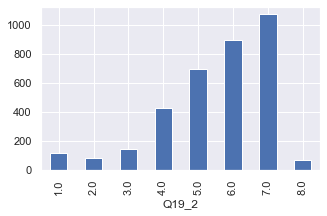

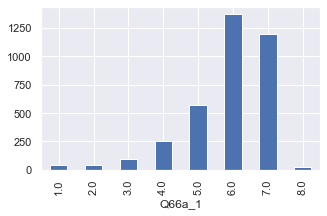

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(5,3)})

for col in numerical_8:
    data.groupby(col).size().plot(kind='bar')
    plt.show()

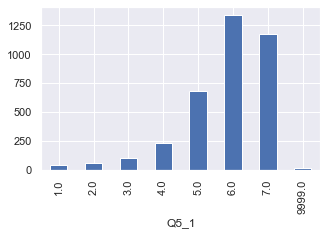

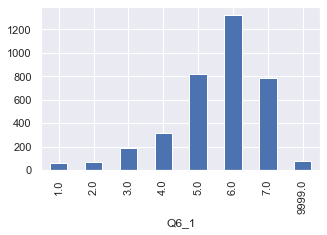

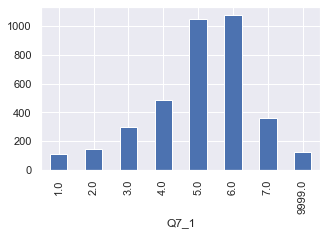

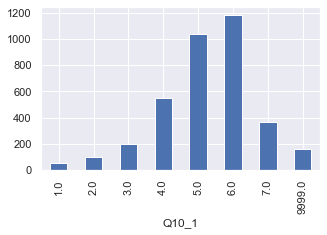

In [29]:
for col in numerical_7_9999:
    data.groupby(col).size().plot(kind='bar')
    plt.show()

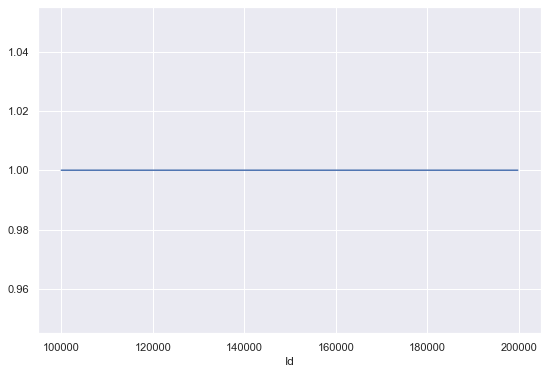

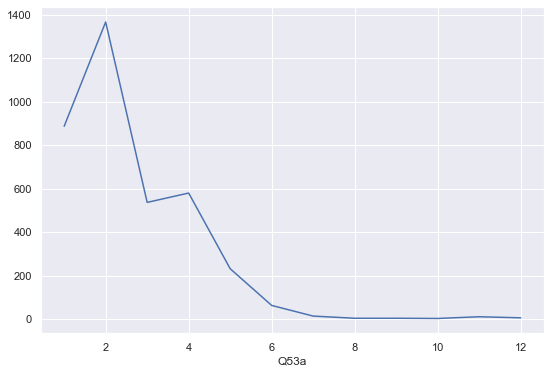

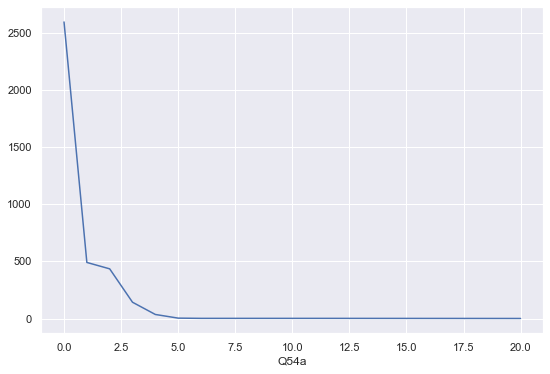

In [30]:
sns.set(rc = {'figure.figsize':(9,6)})

for col in numerical:
    data.groupby(col).size().plot()
    plt.show()

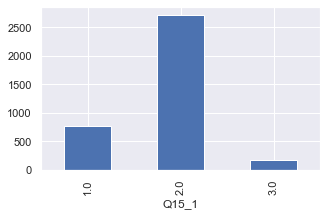

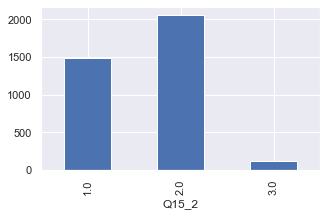

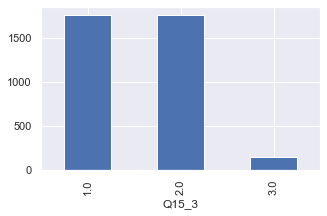

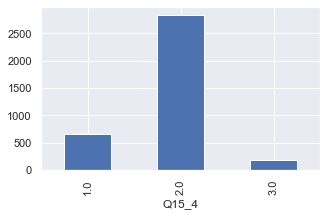

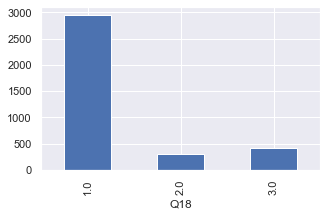

In [31]:
sns.set(rc = {'figure.figsize':(5,3)})

for col in boolean_unsure:
    data.groupby(col).size().plot(kind='bar')
    plt.show()

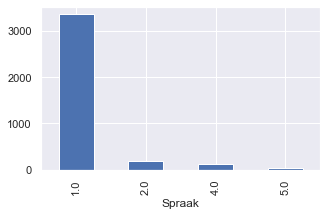

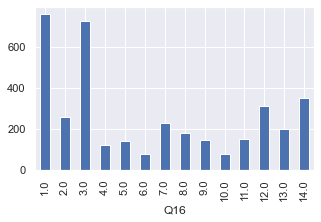

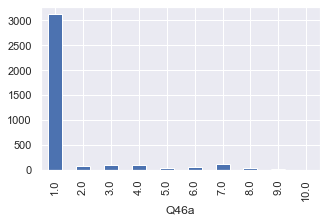

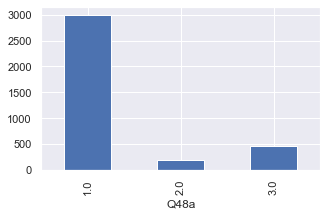

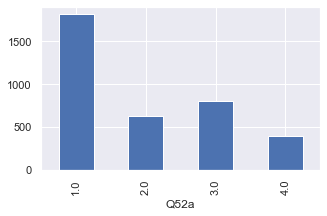

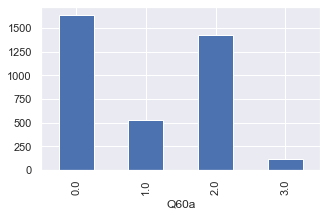

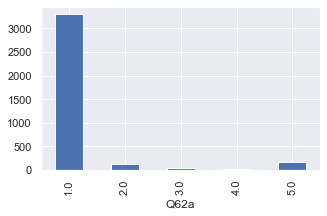

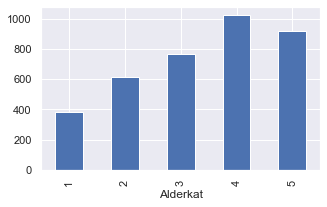

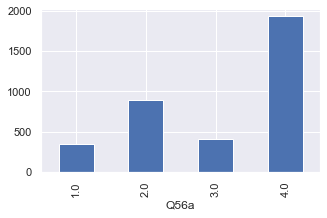

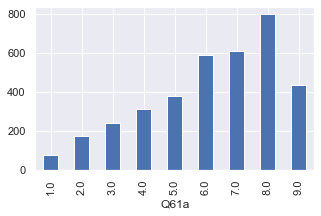

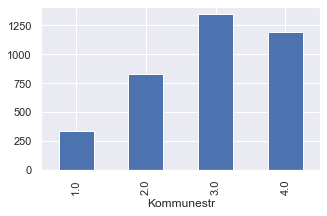

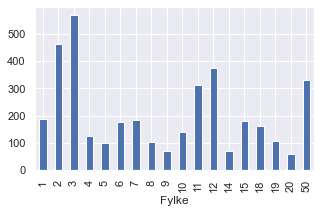

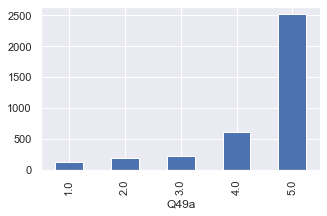

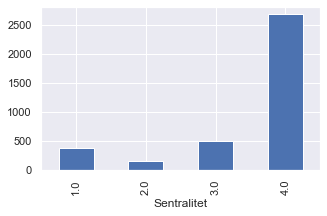

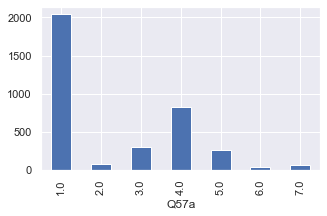

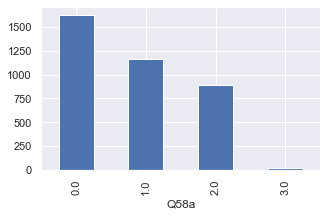

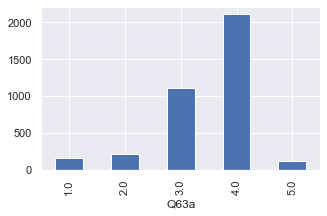

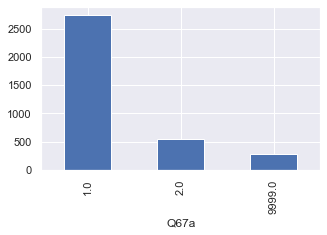

In [32]:
sns.set(rc = {'figure.figsize':(5,3)})

for col in categorical:
    data.groupby(col).size().plot(kind='bar')
    plt.show()

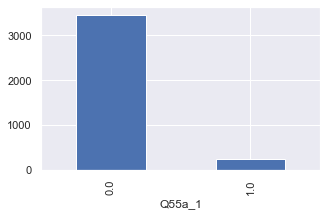

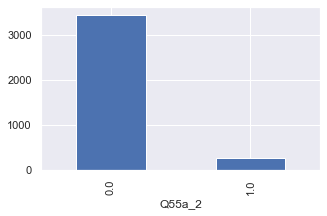

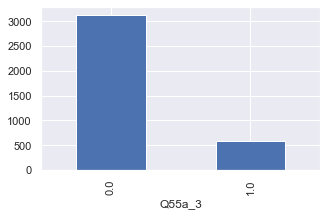

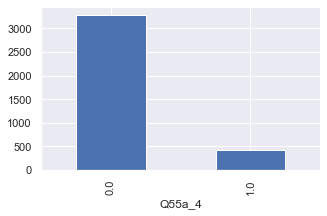

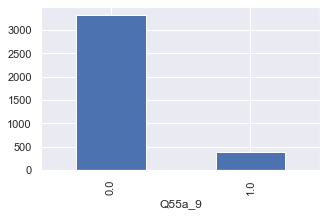

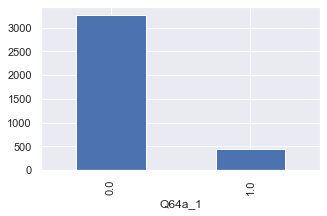

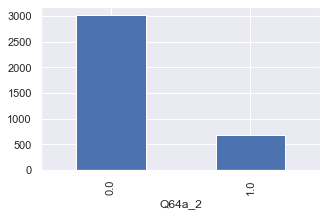

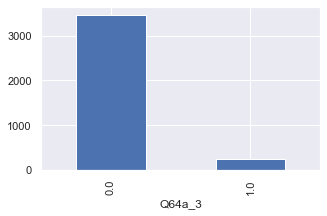

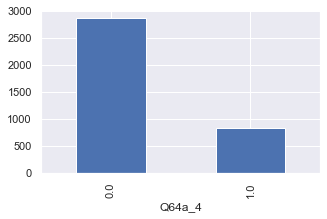

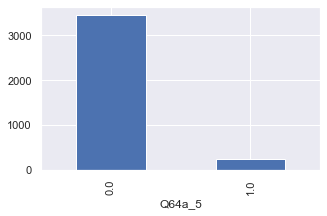

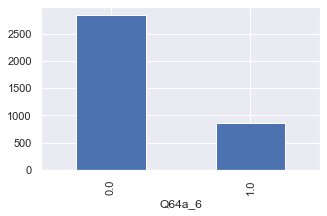

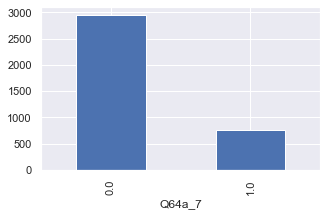

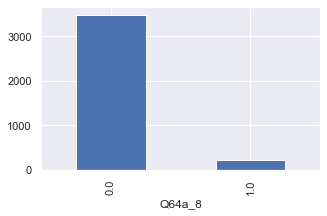

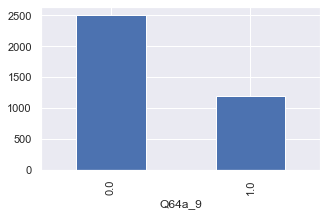

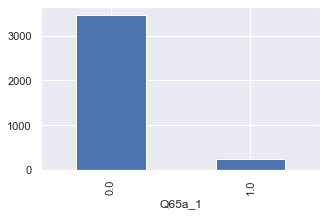

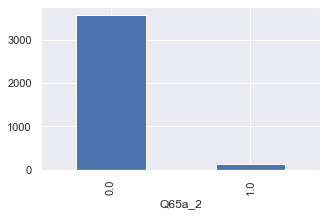

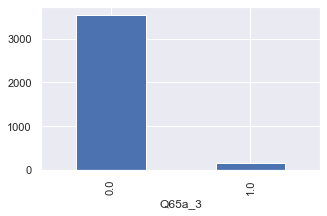

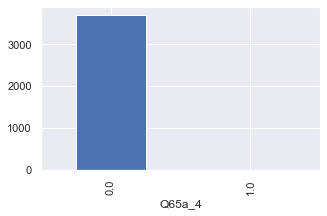

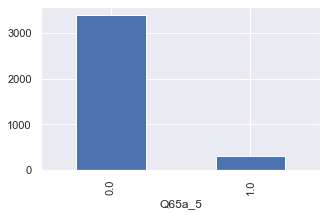

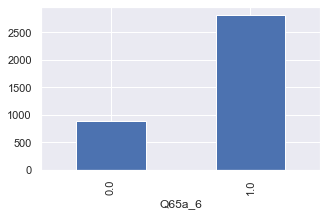

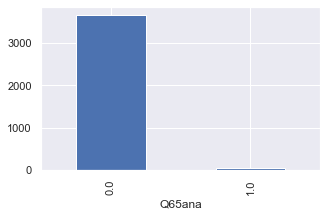

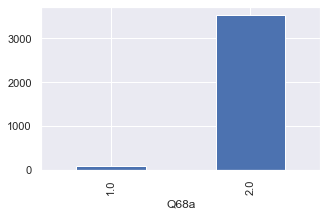

In [33]:
sns.set(rc = {'figure.figsize':(5,3)})

for col in boolean:
    data.groupby(col).size().plot(kind='bar')
    plt.show()

# Plots of party they voted for along with other categorical features

## Party voted for and age groups

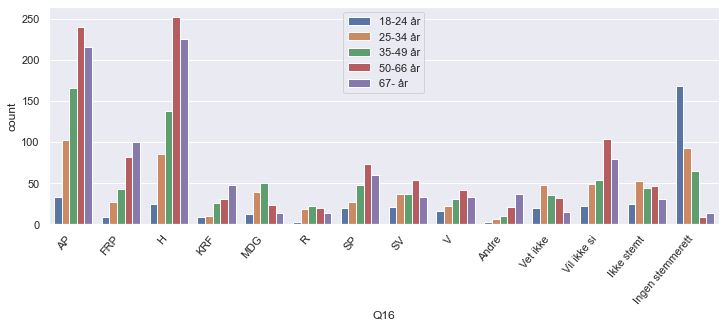

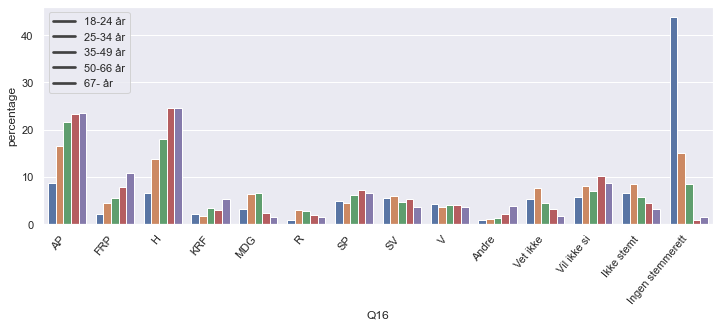

In [34]:
ages=["18-24 år","25-34 år","35-49 år","50-66 år","67- år"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vet ikke","Vil ikke si","Ikke stemt","Ingen stemmerett"]
sns.set(rc = {'figure.figsize':(12,4)})

ax = sns.countplot(hue="Alderkat",x="Q16",data=data)
ax.legend(ages)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()

agegroup_counts = (data.groupby(['Alderkat'])['Q16']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q16'))
p = sns.barplot(x="Q16", y="percentage", hue="Alderkat", data=agegroup_counts)
p.legend(ages)
p.set_xticklabels(parties, rotation=50, ha="right")
_ = plt.setp(p.get_xticklabels(), rotation=50)  # Rotate labels

As we can see in the plot above: 

Since this was for the municipal election that was held in 2015, and the survey was conducted in 2019, over 40 percent of the participants in the youngest age group (18-25) were not eligeble to vote at the time of the election as they were too young. Since this projects main concern is who they voted for in the elections, I will remove everyone who answered that they were not eligable to vote. (For the other age groups, I assume those who have answered that they were not eligible to vote are not permanent norwegian residents or had not gotten their resdency at that time.) I will still keep those who doesnt want to say, and the ones who was eligable for voting but chose not to vote, as these can still give us some interesting information. 

In [35]:
data = data[data.Q16 != 14.]

In [36]:
data["Q16"].unique()

array([ 7., 11.,  1.,  9., 13.,  5., 12.,  3.,  2., 10.,  8.,  6.,  4.])

### After removing those who were not eligable to vote in the election

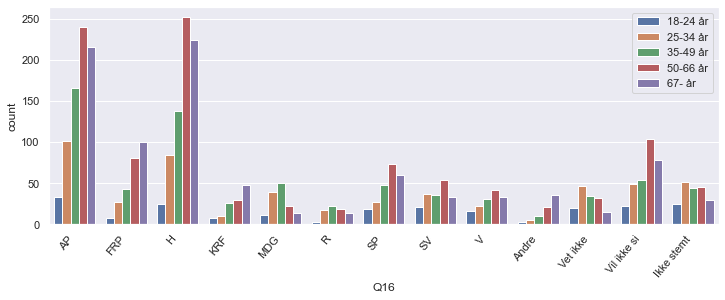

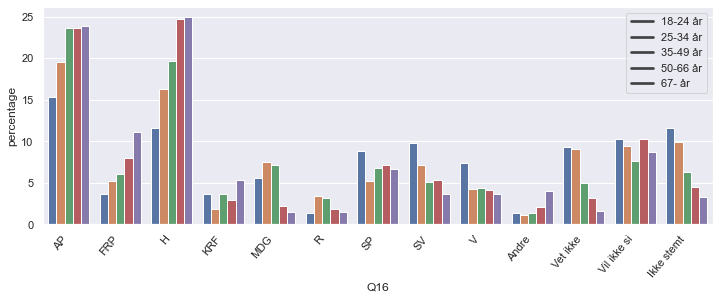

In [37]:
ages=["18-24 år","25-34 år","35-49 år","50-66 år","67- år"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vet ikke","Vil ikke si","Ikke stemt"]
sns.set(rc = {'figure.figsize':(12,4)})

ax = sns.countplot(hue="Alderkat",x="Q16",data=data)
ax.legend(ages)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()

agegroup_counts = (data.groupby(['Alderkat'])['Q16']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q16'))
p = sns.barplot(x="Q16", y="percentage", hue="Alderkat", data=agegroup_counts)
p.legend(ages)
p.set_xticklabels(parties, rotation=50, ha="right")
_ = plt.setp(p.get_xticklabels(), rotation=50)  # Rotate labels

That worked wonders! Now we get a more clear and realistic view of how the different age groups voted. 

## Party voted for and education

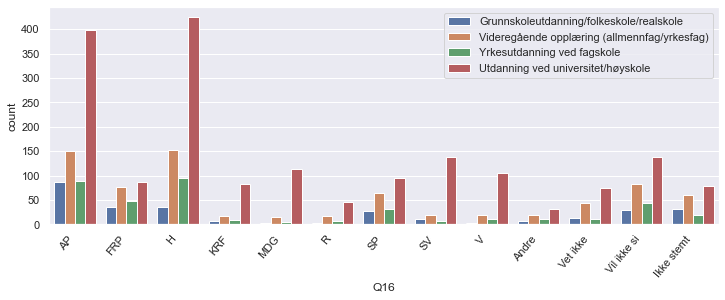

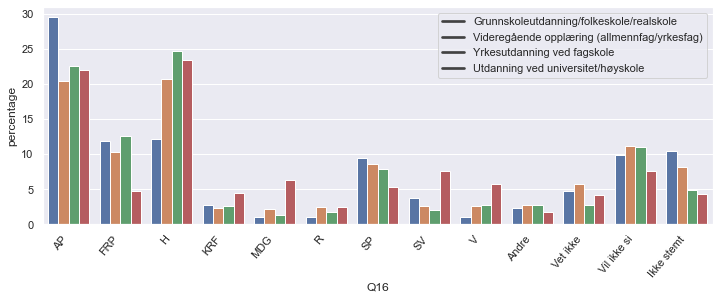

In [38]:
edu=["Grunnskoleutdanning/folkeskole/realskole","Videregående opplæring (allmennfag/yrkesfag)","Yrkesutdanning ved fagskole","Utdanning ved universitet/høyskole"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vet ikke","Vil ikke si","Ikke stemt"]
sns.set(rc = {'figure.figsize':(12,4)})

ax = sns.countplot(hue="Q56a",x="Q16",data=data)
ax.legend(edu)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()

edu_counts = (data.groupby(['Q56a'])['Q16']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q16'))
p = sns.barplot(x="Q16", y="percentage", hue="Q56a", data=edu_counts)
p.legend(edu)
p.set_xticklabels(parties, rotation=50, ha="right")
_ = plt.setp(p.get_xticklabels(), rotation=50)  # Rotate labels

## Party voted for and income

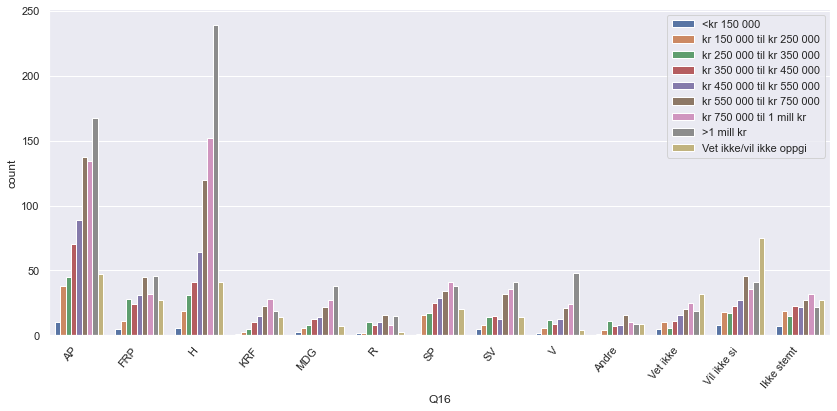

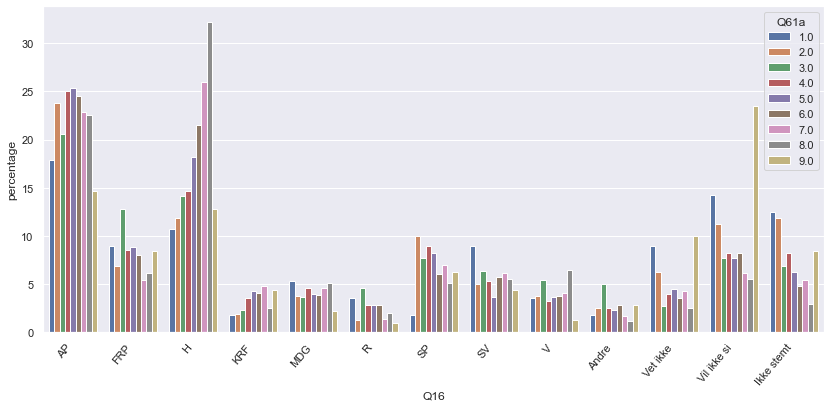

In [39]:
income=["<kr 150 000","kr 150 000 til kr 250 000","kr 250 000 til kr 350 000",
        "kr 350 000 til kr 450 000","kr 450 000 til kr 550 000","kr 550 000 til kr 750 000",
        "kr 750 000 til 1 mill kr",">1 mill kr","Vet ikke/vil ikke oppgi"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vet ikke","Vil ikke si","Ikke stemt"]
sns.set(rc = {'figure.figsize':(14,6)})

ax = sns.countplot(hue="Q61a",x="Q16",data=data)
ax.legend(income)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()

income_counts = (data.groupby(['Q61a'])['Q16']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q16'))
p = sns.barplot(x="Q16", y="percentage", hue="Q61a", data=income_counts)
#p.legend(income)
p.set_xticklabels(parties, rotation=50, ha="right")
_ = plt.setp(p.get_xticklabels(), rotation=50)  # Rotate labels

## Party voted for and how content they are with their life

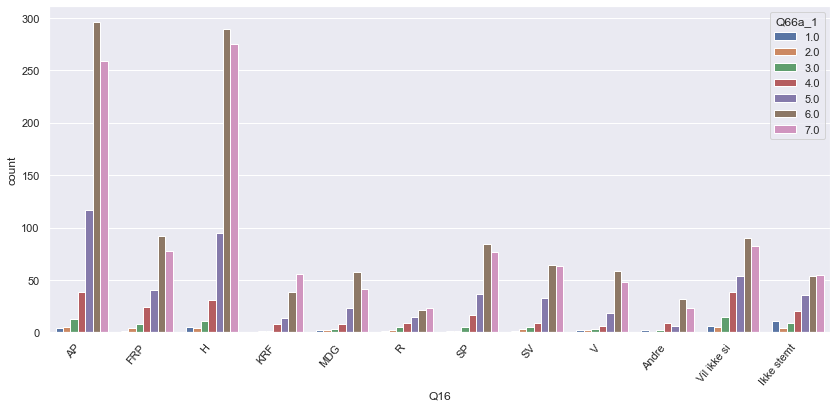

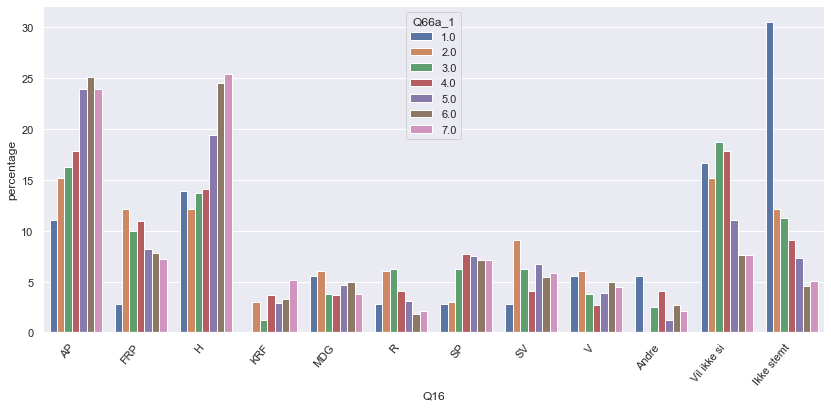

In [40]:
happiness = ["Very discontent -3", "-2", "-1", "0", "+1", "+2", "Very content +3"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vil ikke si","Ikke stemt"]
sns.set(rc = {'figure.figsize':(14,6)})

#Visualize without those who do not know
without_8 = data[data.Q66a_1 != 8]
without_8 = without_8[without_8.Q16 != 11.0]

ax = sns.countplot(hue="Q66a_1",x="Q16",data=without_8)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()

happy_counts = (without_8.groupby(['Q66a_1'])['Q16']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q16'))
without_8["Q66a_1"] = without_8["Q66a_1"].map(dict(zip(range(1,7), happiness)))

p = sns.barplot(x="Q16", y="percentage", hue="Q66a_1", data=happy_counts)
p.set_xticklabels(parties, rotation=50, ha="right")
#p.legend(happiness)
_ = plt.setp(p.get_xticklabels(), rotation=50)  # Rotate labels

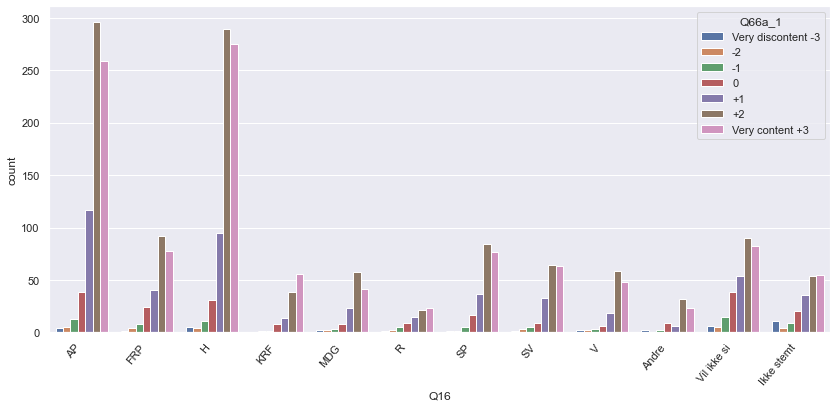

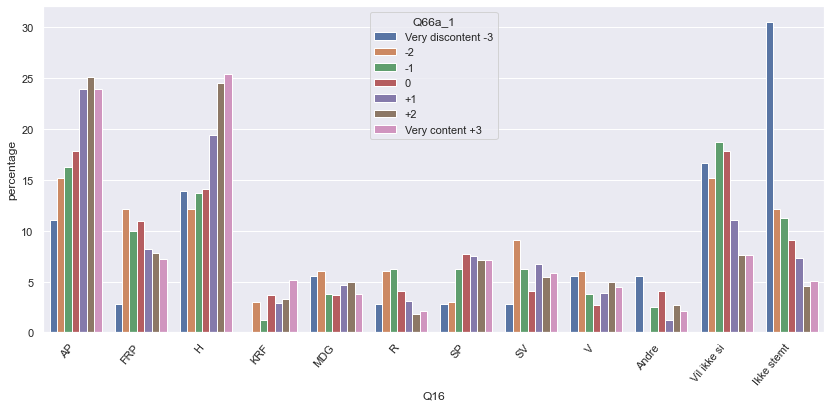

In [44]:
happiness = ["Very discontent -3", "-2", "-1", "0", "+1", "+2", "Very content +3"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vil ikke si","Ikke stemt"]
sns.set(rc = {'figure.figsize':(14,6)})

#Visualize without those who do not know
without_8 = data[data.Q66a_1 != 8]
without_8 = without_8[without_8.Q16 != 11.0]
without_8["Q66a_1"] = without_8["Q66a_1"].map(dict(zip(range(1,8), happiness)))

ax = sns.countplot(hue="Q66a_1",x="Q16",data=without_8, hue_order=happiness,)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()

happy_counts = (without_8.groupby(['Q66a_1'])['Q16']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q16'))

p = sns.barplot(x="Q16", y="percentage", hue="Q66a_1", hue_order=happiness, data=happy_counts)
p.set_xticklabels(parties, rotation=50, ha="right")
_ = plt.setp(p.get_xticklabels(), rotation=50)  # Rotate labels

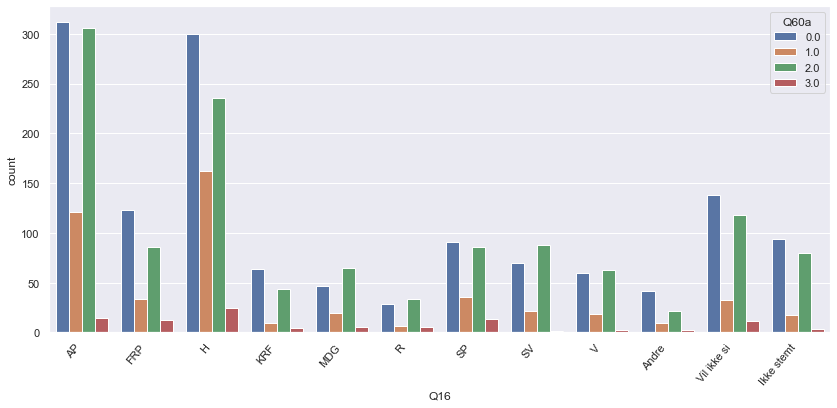

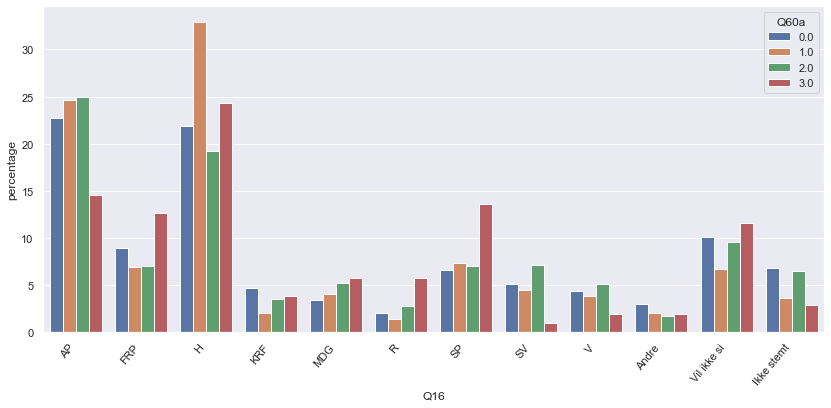

In [45]:
#happiness = ["Very discontent -3", "-2", "-1", "0", "+1", "+2", "Very content +3"]
parties = ["AP","FRP","H","KRF","MDG","R","SP","SV","V","Andre","Vil ikke si","Ikke stemt"]
sns.set(rc = {'figure.figsize':(14,6)})

#Visualize without those who do not know
without_8 = data[data.Q66a_1 != 8]
without_8 = without_8[without_8.Q16 != 11.0]

ax = sns.countplot(hue="Q60a",x="Q16",data=without_8)
ax.set_xticklabels(parties, rotation=50, ha="right")
plt.show()

happy_counts = (without_8.groupby(['Q60a'])['Q16']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Q16'))
#without_8["Q60a"] = without_8["Q60a"].map(dict(zip(range(1,7), happiness)))

p = sns.barplot(x="Q16", y="percentage", hue="Q60a", data=happy_counts)
p.set_xticklabels(parties, rotation=50, ha="right")
#p.legend(happiness)
_ = plt.setp(p.get_xticklabels(), rotation=50)  # Rotate labels

In [42]:
data.to_csv("kommune_clean.csv")